# Chapter 1 Introduction
## 1.1 Example: Polynomial Curve Fitting
Now suppose that we are given a training set comprising $N$ observations of $x$, written $\mathbf{x} = (x_1,\cdots,x_N)^T$, together with corresponding observations of the values of t, denoted $\mathbf{t} = (t_1,\cdots,t_N)^T$. Our goal is to exploit this training set in order to make predictions of the value $\hat{t}$ of the target variable for some new value $\hat{x}$ of the input variable. For a given $\hat{x}$, there is uncertainty as to the appropriate value for $\hat{t}$.

Loss function without regularization
$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N \{y(x_n,\mathbf{w}) - t_n\}^2$$

Loss function with regularization
$$\tilde{E}(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N \{y(x_n,\mathbf{w}) - t_n\}^2 + \frac{\lambda}{2}||\mathbf{w}||^2$$
The particular case of a quadratic regularizer is called $\textit{ridge regression}$. In the context of neural networks, this approach is known as $\textit{weight decay}$.
## 1.2 Probability Theory
**The Rules of Probability**

**sum rule** 
$$P(X) = \sum_Y p(X,Y)$$
**product rule**
$$P(X,Y) = p(Y|X)p(X)$$

**Bayes' theorem**
$$p(Y|X) = \frac{p(X|Y)}{p(X)}p(Y)$$
where the denominator can be expressed in terms of the quantities appearing in the numerator
$p(X) = \sum_Y p(X|Y)p(Y)$.

**Independent** 
$$P(X,Y) = P(X)P(Y)\text{    or    } P(Y|X) = P(Y)$$ 

### Expectation
$\mathbb{E}[f] = \int p(x)f(x)dx$ (wenzhe: population, action)

$\mathbb{E}_x[f(x,y)]$ is a function of $y$, which denotes the average of the function $f(x,y)$ with respect to the distribution of x

$\mathbb{E}_x[f|y] = \int p(x|y)f(x) dx$ conditional expection

### Variance
$\mathbb{var}[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2$
### Covariance
$\mathbb{cov}[x,y] = \mathbb{E}_{x,y}[(x-\mathbb{E}[x])(y - \mathbb{E}[y])]$

### Bayesian probabilities
Bayesian view provides a quantification of uncertainty. We capture our assumptions about $\mathbf{w}$, before observing the data, in the form of a prior probability distribution $p(\mathbf{w})$. The effect of the observed data $\mathcal{D} = \{t_1,\cdots,t_N\}$ is expressed through the conditional probability $p(\mathcal{D}|\mathbf{w})$.
$$p(\mathbf{w}|\mathcal{D}) = \frac{p(\mathcal{D}|\mathbf{w})p(\mathbf{w})}{p(\mathcal{D})}$$

which allows us to evaluate the uncertainty in $\mathbf{w}$ after we observed $\mathcal{D}$ in the form of the posterior probability $p(\mathbf{w}|\mathcal{D})$. The likelihood function $p(\mathcal{D}|\mathbf{w})$ expresses how probable the observed data set is for different settings of the parameter vector $\mathbf{w}$.

Now suppose that we have a data set of observations $\mathbf{x} = (x_1,\cdots,x_N)^T$ and this set is i.i.d., the maximum likelihood solution is given by the sample mean, and sample variance (measured with respect to the sample mean)
$$\mu_{ML}\frac{1}{N}\sum_{n=1}^Nx_n$$
$$\sigma_{ML}^2 = \frac{1}{N}\sum_{n=1}^N(x_n-\mu_{ML})^2$$
which random variables depending on the data set. Their expectations are given below.
$$\mathbb{E}[\mu_{ML}] = \mu$$
$$\mathbb{E}[\sigma_{ML}^2] = \frac{N-1}{N}\sigma^2$$. The unbiased variance estimator is 
$$\tilde{\sigma}^2 = \frac{N}{N-1}\sigma_{ML}^2$$

We assume that, given the value of $x$, the corresponding value of $t$ has a Gaussian distribution with a mean equal to the value $y(x,\mathbf{w})$ of the polynomial curve given by
$$p(t|x,\mathbf{w},\beta) = \mathcal{N}(t|y(x,\mathbf{w}),\beta^{-1})$$

which is a probabilistic model, expressed in terms of the $\textit{predictive distribution}$. This model gives the probability distribution over t, rather than simply a point estimate.
$$p(t|x,\mathbf{w}_{ML},\beta_{ML}) = \mathcal{N}(t|y(x,\mathbf{w}_{ML}),\beta_{ML}^{-1})$$. 

Given the Gaussian prior $p(\mathbf{w}|\alpha) = \mathcal{N}(\mathbf{w}|\mathbf{0},\alpha^{-1}\mathbf{I})$, maximizing the posterior distribution is equivalent to minimizing the regularized sum-of-squares error function with a regularization parameter given by $\lambda = \alpha/\beta$.

### Bayesian curve fitting
Although we have included a prior distribution $p(\mathbf{w}|\alpha)$, we so far still making a point estimate of $\mathbf{w}$ and so this does not yet amount to a Bayesian treatment. In a fully Bayesian approach, we should consistently apply the sum and product rules of probability, which requires that we integrate over all values of $\mathbf{w}$. Such merginalizations lie at the heart of Bayesian methods for pattern recognition.

The predictive distribution is given as follows ($\mathbf{x}$ and $\mathbf{t}$ are observed data, $x$ is a new data, $t$ is the prediction for $x$)
$$p(t|x,\mathbf{x},\mathbf{t}) = \int p(t|x,\mathbf{w})p(\mathbf{w}|\mathbf{x},\mathbf{t})d\mathbf{w}$$

where $p(t|x,\mathbf{w}) = \mathcal{N}(t|y(x,\mathbf{w}),\beta^{-1})$, $p(\mathbf{w}|\mathbf{w},\mathbf{t})$ is found by normalizing $p(\mathbf{t}|\mathbf{x},\mathbf{w},\beta)p(\mathbf{w}|\alpha)$. (wenzhe: randomness comes from the observed data ($\mathbf{x}$, $\mathbf{t}$)) and the prediction distribution ($t$).

We see that the variance, as well as the mean, of the predictive distribution is dependent on $x$. The first term in represents the uncertainty in the predicted value of $t$ due to the noise on the target variables and was expressed already in the maximum likelihood predictive distribution through $\beta_{ML}^{-1}$. However, the second term arises from the uncertainty in the parameters $\mathbf{w}$ and is a consequence of the Bayesian treatment. 

## 1.3 Model Selection

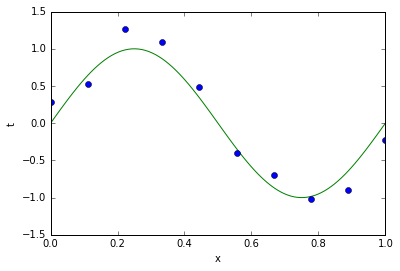

In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
def fig1d2(N = 10,scale = 0.25):
    tx = np.linspace(0,1,100)
    ty = np.sin(2*np.pi*tx)
    plt.plot(tx,ty,'g-')
    x = np.linspace(0,1,N)
    y = np.sin(2*np.pi*x) + np.random.normal(scale = scale, size = N)
    plt.plot(x,y,'bo')
    plt.ylim([-1.5,1.5])
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
fig1d2()